<a href="https://colab.research.google.com/github/thecodeeagle/Genetic-Algorithm-Based-Ensemble-for-Driver-Distraction-Recognition/blob/main/EfficientDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights="imagenet", input_shape=(224,224,3),include_top=False,)

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import keras
from tensorflow.keras import datasets,models,layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import matplotlib.pyplot as plt

In [ ]:
model.summary()

In [ ]:
x2 = Flatten()(model.output)
x3 = Dense(1024, activation="relu")(x2)
out = Dense(10, activation ='softmax')(x3)

In [ ]:
from keras import Model
model = Model(inputs = model.input, outputs = out)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=0.0001),metrics=["acc"])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
import keras

In [ ]:
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
       
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "Training Loss")
            plt.plot(N, self.acc, label = "Training Accuracy")
            plt.title("Training Loss and Accuracy ")
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

In [ ]:
loaded = np.load("drive/My Drive/newdriver.npz")
train_images = loaded['train_images']
train_labels = loaded['train_labels']

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)

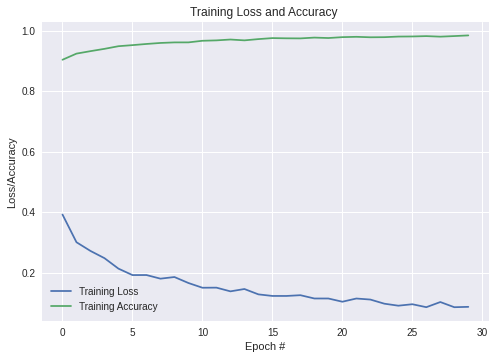

In [ ]:
history = model.fit(train_images, train_labels, epochs = 30, callbacks=[plot_losses])

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
test_labels = tf.keras.utils.to_categorical(test, num_classes=10)

In [ ]:
test_images = loaded['test_images']
test = loaded['test_labels']

In [ ]:
model = keras.models.load_model("drive/My Drive/new_densenet3")

In [ ]:
model.evaluate(test_images,test_labels)

144/144 [==============================] - 36s 166ms/step - loss: 2.8615 - accuracy: 0.9363


[2.861501455307007, 0.9362766146659851]

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(35, 25)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_plot_labels = ['Safe Driving','Text Right','Phone Right', 'Text Left', 'Phone_Left','Adjust Radio', 'Drinking', 'Reaching Behind', 'Hair or Makeup', 'Talking to Passenger']
cm= confusion_matrix(y_true = test, y_pred = y_pred)

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', normalize = True)